# 결측치 처리
## plant1 결측치 처리

In [2]:
import pandas as pd
import missingno  #결측치를 확인하기 위해 쓰는 모듈
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
plant1 = pd.read_csv("data/11.rawdata_plant/plant1_train.csv", encoding="utf-8")

In [4]:
plant1 = plant1.iloc[:,1:].copy()
plant1.columns = plant1.columns.str.replace("plant1_train.", "")
plant1.columns = plant1.columns.str.upper()
plant1

<ipython-input-4-8f018de395fd>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  plant1.columns = plant1.columns.str.replace("plant1_train.", "")


,MEA_DDHR,TEM_IN_LOC1,HUM_IN_LOC1,TEM_COIL_LOC1,TEM_IN_LOC2,HUM_IN_LOC2,TEM_COIL_LOC2,TEM_IN_LOC3,HUM_IN_LOC3,TEM_COIL_LOC3,TEM_OUT_LOC1,HUM_OUT_LOC1,COND_LOC1,COND_LOC2,COND_LOC3
0,2016-04-01 0:00,16.00,24.00,11.00,14.00,23.00,11.00,13.00,32.00,10.00,9.00,42.00,0.0,0.0,0.0
1,2016-04-01 3:00,14.00,28.00,10.00,12.00,32.00,9.00,11.00,42.00,7.00,7.00,59.00,0.0,0.0,0.0
2,2016-04-01 6:00,13.00,33.00,10.00,11.00,37.00,9.00,10.00,44.00,7.00,6.00,56.00,0.0,0.0,0.0
3,2016-04-01 9:00,13.00,33.00,10.00,11.00,35.00,9.00,10.00,41.00,8.00,18.00,30.00,0.0,0.0,0.0
4,2016-04-01 12:00,16.00,28.00,10.00,15.00,27.00,11.00,14.00,30.00,9.00,18.00,20.00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58744,2019-03-31 23:10,10.52,36.39,10.52,10.55,35.20,11.17,9.85,37.88,9.79,6.40,43.86,0.0,0.0,0.0
58745,2019-03-31 23:20,10.52,37.09,10.44,10.55,35.53,11.09,9.88,38.40,9.72,6.34,44.02,0.0,0.0,0.0
58746,2019-03-31 23:30,10.43,37.18,10.56,10.49,35.65,11.21,9.85,38.22,9.91,6.40,43.04,0.0,0.0,0.0
58747,2019-03-31 23:40,10.49,38.00,10.56,10.55,36.08,11.21,9.82,38.95,9.83,6.31,45.33,0.0,0.0,0.0


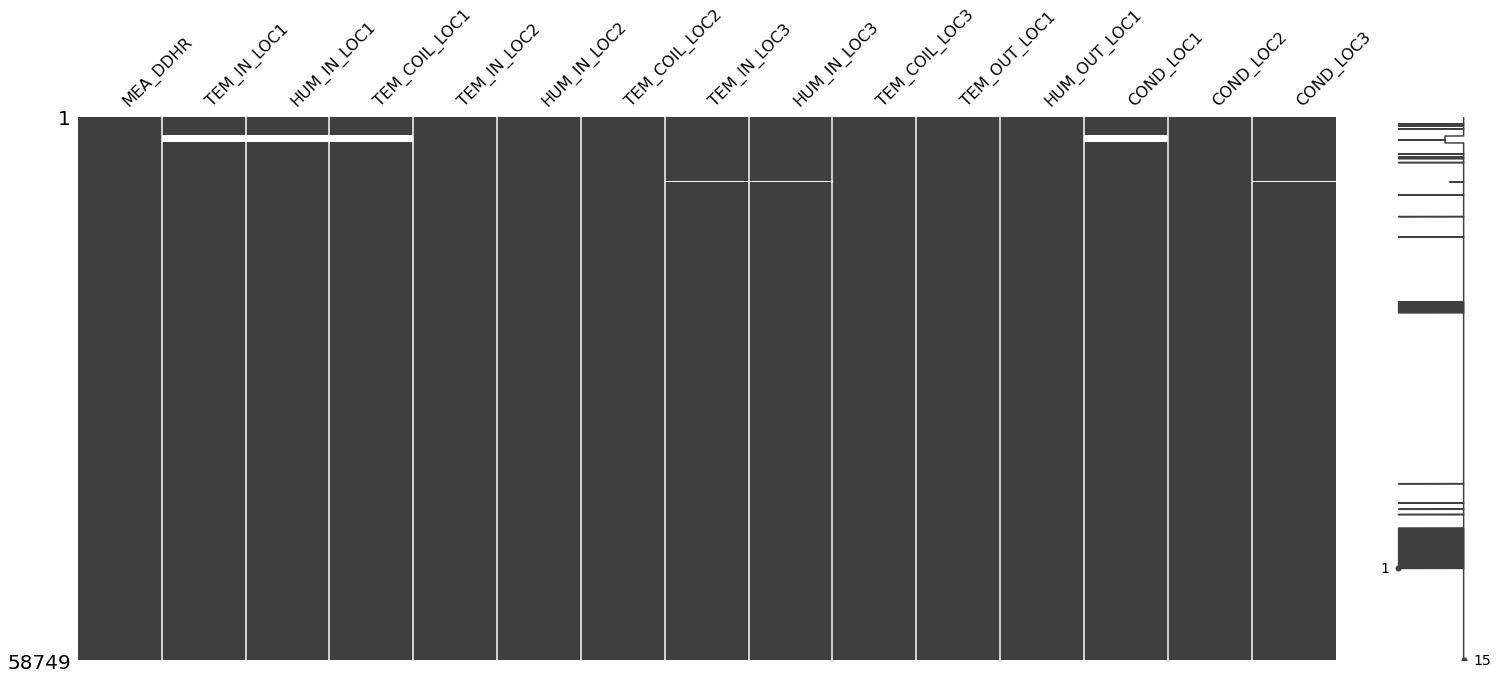

In [5]:
missingno.matrix(plant1)
plt.show()

In [6]:
plant1_null = plant1.copy()

### plant1 nan 값 선형값으로 결측치 보간

In [7]:
plant1_null = plant1_null.interpolate(method="linear")  #선형값으로결측치 채움

In [8]:
plant1.loc[976:980]

,MEA_DDHR,TEM_IN_LOC1,HUM_IN_LOC1,TEM_COIL_LOC1,TEM_IN_LOC2,HUM_IN_LOC2,TEM_COIL_LOC2,TEM_IN_LOC3,HUM_IN_LOC3,TEM_COIL_LOC3,TEM_OUT_LOC1,HUM_OUT_LOC1,COND_LOC1,COND_LOC2,COND_LOC3
976,2016-08-01 0:00,31.21,67.40,31.24,29.81,73.08,29.90,29.02,75.98,29.18,26.03,86.32,0.0,0.0,0.0
977,2016-08-01 3:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
978,2016-08-01 6:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
979,2016-08-01 9:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
980,2016-08-01 12:00,30.67,68.25,30.70,29.87,71.79,29.37,28.89,75.37,29.02,28.53,73.78,0.0,0.0,0.0


In [9]:
plant1_null.loc[976:980]

,MEA_DDHR,TEM_IN_LOC1,HUM_IN_LOC1,TEM_COIL_LOC1,TEM_IN_LOC2,HUM_IN_LOC2,TEM_COIL_LOC2,TEM_IN_LOC3,HUM_IN_LOC3,TEM_COIL_LOC3,TEM_OUT_LOC1,HUM_OUT_LOC1,COND_LOC1,COND_LOC2,COND_LOC3
976,2016-08-01 0:00,31.210,67.4000,31.240,29.810,73.0800,29.9000,29.0200,75.9800,29.18,26.030,86.320,0.0,0.0,0.0
977,2016-08-01 3:00,31.075,67.6125,31.105,29.825,72.7575,29.7675,28.9875,75.8275,29.14,26.655,83.185,0.0,0.0,0.0
978,2016-08-01 6:00,30.940,67.8250,30.970,29.840,72.4350,29.6350,28.9550,75.6750,29.10,27.280,80.050,0.0,0.0,0.0
979,2016-08-01 9:00,30.805,68.0375,30.835,29.855,72.1125,29.5025,28.9225,75.5225,29.06,27.905,76.915,0.0,0.0,0.0
980,2016-08-01 12:00,30.670,68.2500,30.700,29.870,71.7900,29.3700,28.8900,75.3700,29.02,28.530,73.780,0.0,0.0,0.0


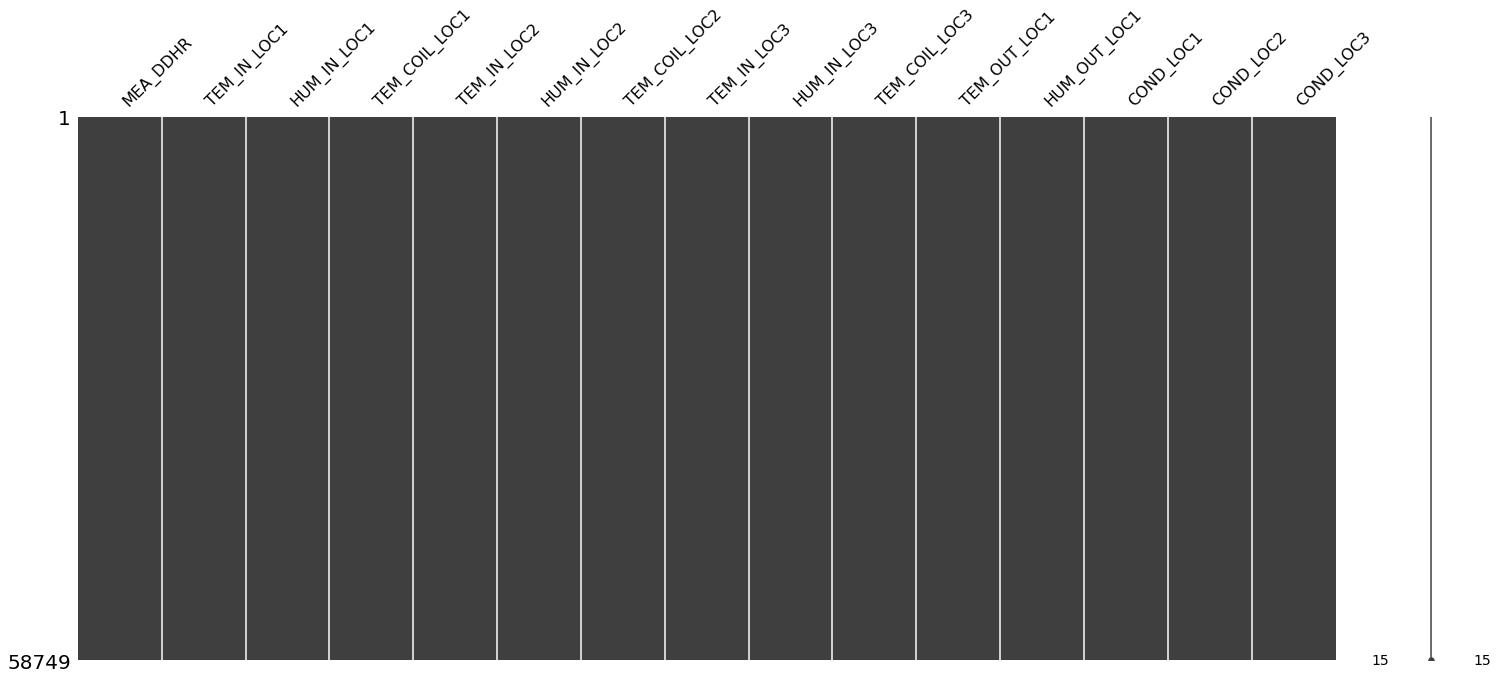

In [10]:
missingno.matrix(plant1_null)
plt.show()

## plant2 결측치 처리

In [11]:
plant2 = pd.read_csv("data/11.rawdata_plant/plant2_train.csv", encoding="utf-8")

In [12]:
plant2 = plant2.iloc[:,1:].copy()
plant2.columns = plant2.columns.str.replace("plant2_train.", "")
plant2.columns = plant2.columns.str.upper()
plant2

<ipython-input-12-e1f55a391694>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  plant2.columns = plant2.columns.str.replace("plant2_train.", "")


,MEA_DDHR,TEM_IN_LOC1,HUM_IN_LOC1,TEM_COIL_LOC1,TEM_IN_LOC2,HUM_IN_LOC2,TEM_COIL_LOC2,TEM_IN_LOC3,HUM_IN_LOC3,TEM_COIL_LOC3,TEM_OUT_LOC1,HUM_OUT_LOC1,COND_LOC1,COND_LOC2,COND_LOC3
0,2016-07-19 18:00,22.39,55.46,27.46,22.48,56.17,29.71,21.94,56.32,30.70,17.72,62.94,0.0,0.0,0.0
1,2016-07-19 21:00,17.81,62.64,27.08,18.09,61.94,27.88,17.75,61.78,28.61,11.37,76.95,0.0,0.0,0.0
2,2016-07-20 0:00,15.13,66.70,26.93,15.49,66.42,26.74,15.89,64.87,27.27,9.79,79.46,0.0,0.0,0.0
3,2016-07-20 3:00,13.82,68.53,26.47,14.03,69.14,26.01,14.64,67.06,26.93,8.35,81.56,0.0,0.0,0.0
4,2016-07-20 6:00,12.93,73.87,26.20,13.05,74.48,25.51,13.69,71.83,26.47,7.68,89.10,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57909,2019-03-31 23:10,9.18,36.32,9.18,9.08,37.58,9.68,8.26,38.34,9.57,4.72,52.11,0.0,0.0,0.0
57910,2019-03-31 23:20,9.24,36.51,9.22,9.02,38.25,9.76,8.29,38.92,9.60,4.66,51.01,0.0,0.0,0.0
57911,2019-03-31 23:30,9.05,36.29,9.11,9.05,38.13,9.76,8.32,39.13,9.49,4.57,51.47,0.0,0.0,0.0
57912,2019-03-31 23:40,8.99,37.33,9.15,9.02,38.49,9.68,8.26,39.62,9.57,4.47,53.14,0.0,0.0,0.0


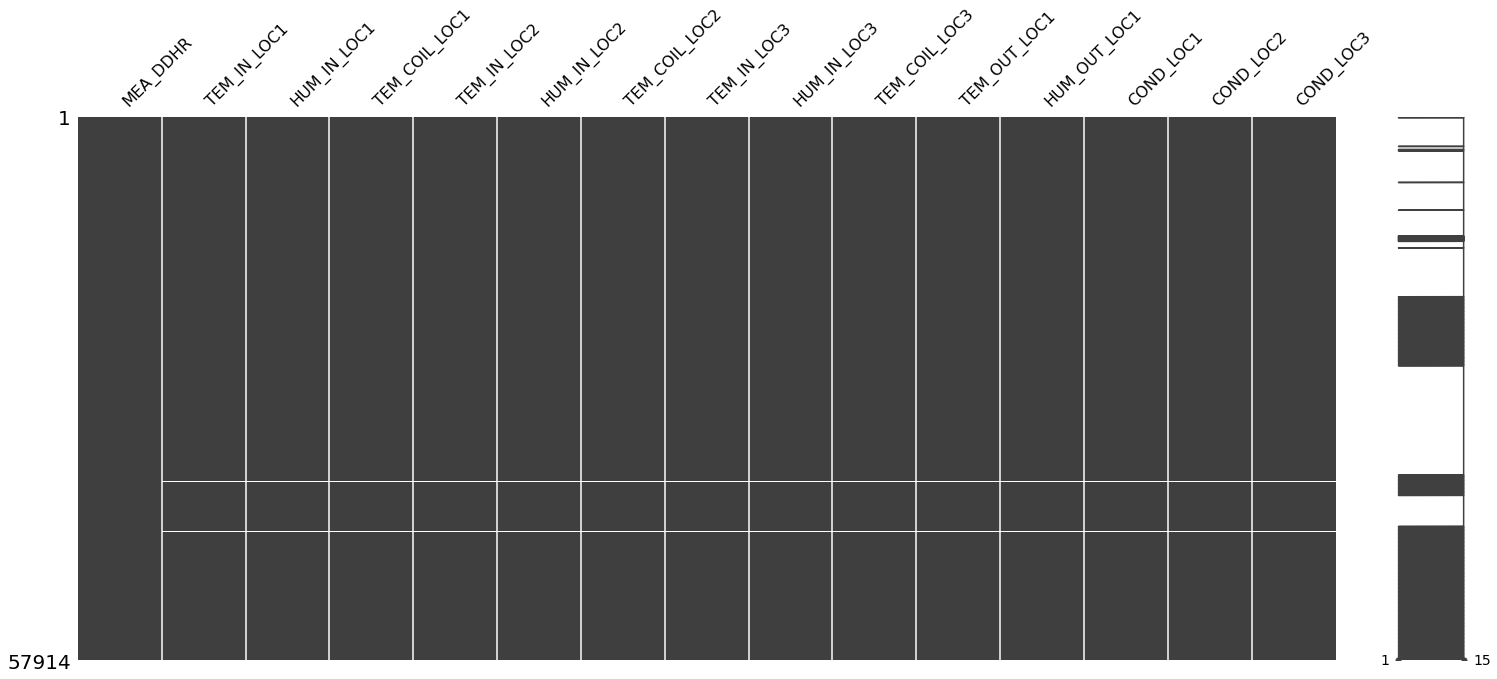

In [13]:
missingno.matrix(plant2)
plt.show()

In [14]:
plant2[plant2.TEM_IN_LOC1.isnull()]

,MEA_DDHR,TEM_IN_LOC1,HUM_IN_LOC1,TEM_COIL_LOC1,TEM_IN_LOC2,HUM_IN_LOC2,TEM_COIL_LOC2,TEM_IN_LOC3,HUM_IN_LOC3,TEM_COIL_LOC3,TEM_OUT_LOC1,HUM_OUT_LOC1,COND_LOC1,COND_LOC2,COND_LOC3
99,2016-08-01 3:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100,2016-08-01 6:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101,2016-08-01 9:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3165,2017-03-17 6:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3166,2017-03-17 9:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57337,2019-03-27 23:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57481,2019-03-28 23:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57625,2019-03-29 23:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57769,2019-03-30 23:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### palnt2 nan 값 dropna() 처리

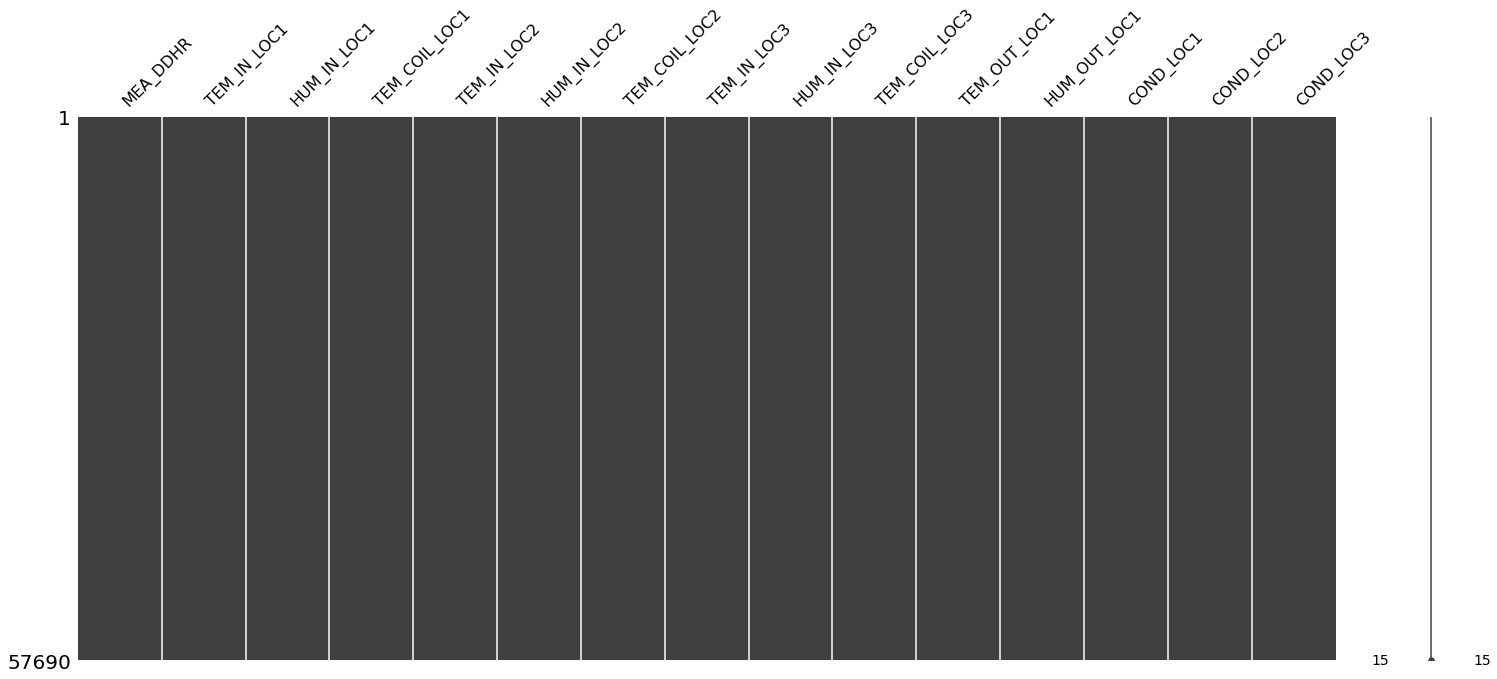

In [15]:
plant2_null = plant2.dropna() #결측치 행 제거
missingno.matrix(plant2_null)
plt.show()

##  plant_test값 확인

In [16]:
plant_test = pd.read_csv("data/11.rawdata_plant/plant_test.csv", encoding="utf-8")
plant_test = plant_test.iloc[:,1:].copy()
plant_test.columns = plant_test.columns.str.replace("plant_test.", "")
plant_test.columns = plant_test.columns.str.upper()

<ipython-input-16-d1a5af0abfae>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  plant_test.columns = plant_test.columns.str.replace("plant_test.", "")


In [17]:
plant_test.head()

,MEA_DDHR,PLANT,LOC,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,X24H_TMA,X24H_COND_LOC,X48H_TMA,X48H_COND_LOC
0,2019-04-01 0:00,2,3,8.17,40.42,10.10,4.20,54.82,2019-04-02 0:00,NaN,2019-04-03 0:00,NaN
1,2019-04-01 4:30,1,2,10.03,48.81,10.79,6.09,59.34,2019-04-02 4:30,NaN,2019-04-03 4:30,NaN
2,2019-04-01 10:30,2,3,9.45,40.93,9.07,12.26,32.14,2019-04-02 10:30,NaN,2019-04-03 10:30,NaN
3,2019-04-01 11:00,1,1,12.32,34.13,10.86,12.32,28.27,2019-04-02 11:00,NaN,2019-04-03 11:00,NaN
4,2019-04-01 13:30,2,1,11.28,22.65,8.76,12.01,19.84,2019-04-02 13:30,NaN,2019-04-03 13:30,NaN


<AxesSubplot:>

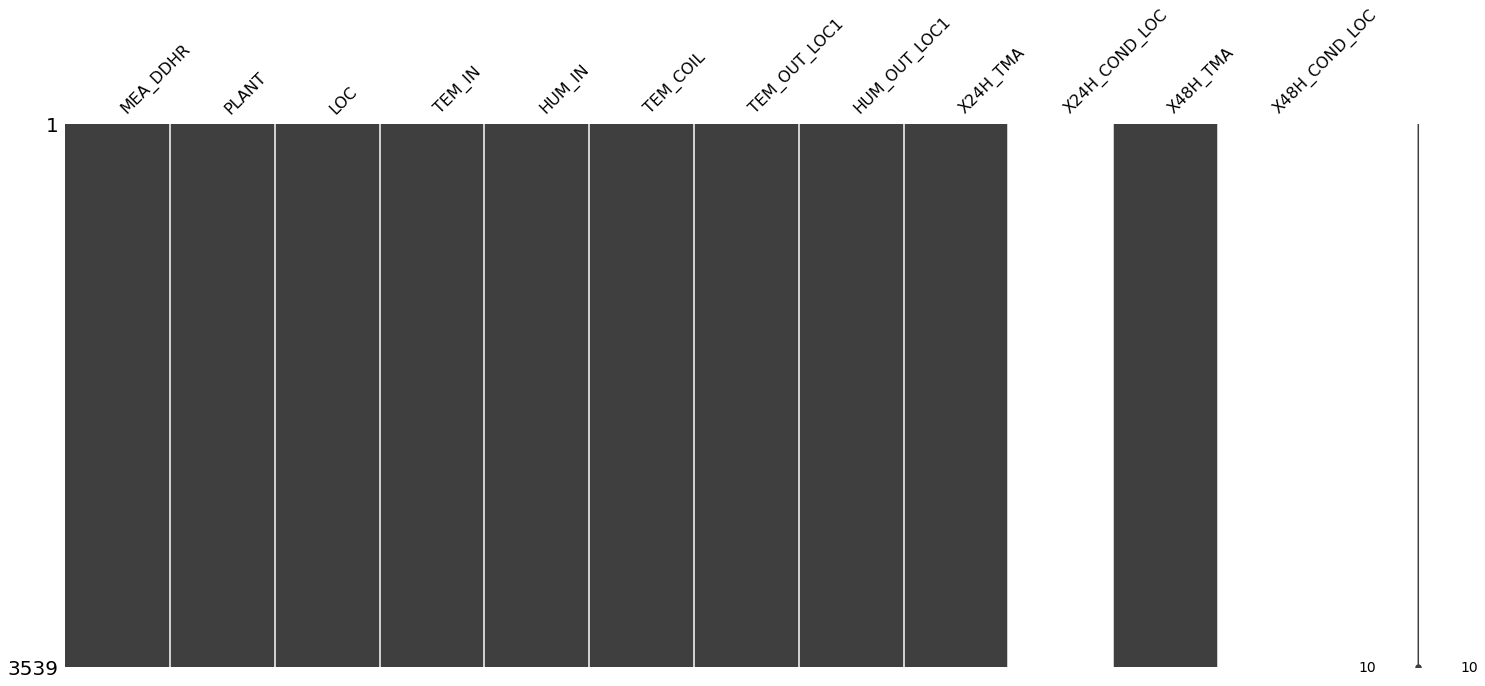

In [18]:
missingno.matrix(plant_test)

In [19]:
plant_test.to_csv("data/21.savedata_plant/test_data.csv",index=False)

# plant1 + plant2 -> test_data화 시키기

In [20]:
def divide_location(i,j):
    """train data 의 형식을 test데이터 형식으로 변환하기 """
    if(i == 1):
        data = plant1.loc[:,["MEA_DDHR","TEM_IN_LOC"+str(j),"HUM_IN_LOC"+ str(j), 
                                "TEM_COIL_LOC"+str(j),"TEM_OUT_LOC1","HUM_OUT_LOC1",
                             "COND_LOC"+str(j)]]
        data["LOC"] = j
        data["PLANT"] = i
        data.columns = ["MEA_DDHR", "TEM_IN", "HUM_IN", "TEM_COIL", "TEM_OUT_LOC1", "HUM_OUT_LOC1","COND_LOC","LOC", "PLANT"]
        
    elif(i == 2):
        data = plant2.loc[:,["MEA_DDHR","TEM_IN_LOC"+str(j),"HUM_IN_LOC"+ str(j), 
                                "TEM_COIL_LOC"+str(j),"TEM_OUT_LOC1","HUM_OUT_LOC1",
                             "COND_LOC"+str(j)]]
        data["LOC"] = j
        data["PLANT"] = i
        data.columns = ["MEA_DDHR", "TEM_IN", "HUM_IN", "TEM_COIL", "TEM_OUT_LOC1", "HUM_OUT_LOC1","COND_LOC","LOC","PLANT"]
    else:
        print("i의 범위는 1~2까지 공장번호를 뜻함 j의 범위는 1~3 까지 LOCATION을 뜻함")
    return data

In [21]:
def plantConcatAndSort():
    """1,2 번 공장 합친후 날짜,공장,지역 정렬후 인덱스 초기화 해주는 함수"""
#   공장 1번 2번 합쳐주기
    plant_all = pd.concat([divide_location(1,1), divide_location(1,2), divide_location(1,3),
    divide_location(2,1), divide_location(2,2), divide_location(2,3)])
#   공장 날짜, 공장,지역 정렬후 인덱스 초기화 시키기 
    plant_all['MEA_DDHR'] = pd.to_datetime(plant_all['MEA_DDHR'])  #object >> datetime
    plant= plant_all.sort_values(by=['MEA_DDHR', 'PLANT', 'LOC'])
    plant = plant.reset_index(drop=True)
#     컬럼 순서 바꿔주기
    plant = plant[['MEA_DDHR', 'PLANT', 'LOC', 'TEM_IN', 'HUM_IN', 'TEM_COIL', 'TEM_OUT_LOC1', 'HUM_OUT_LOC1', 'COND_LOC']]
    return plant

In [22]:
plant1 = plant1_null
plant2 = plant2_null

In [23]:
plant = plantConcatAndSort()

In [24]:
plant

,MEA_DDHR,PLANT,LOC,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,COND_LOC
0,2016-04-01 00:00:00,1,1,16.00,24.00,11.00,9.00,42.00,0.0
1,2016-04-01 00:00:00,1,2,14.00,23.00,11.00,9.00,42.00,0.0
2,2016-04-01 00:00:00,1,3,13.00,32.00,10.00,9.00,42.00,0.0
3,2016-04-01 03:00:00,1,1,14.00,28.00,10.00,7.00,59.00,0.0
4,2016-04-01 03:00:00,1,2,12.00,32.00,9.00,7.00,59.00,0.0
...,...,...,...,...,...,...,...,...,...
349312,2019-03-31 23:40:00,2,2,9.02,38.49,9.68,4.47,53.14,0.0
349313,2019-03-31 23:40:00,2,3,8.26,39.62,9.57,4.47,53.14,0.0
349314,2019-03-31 23:50:00,1,1,10.49,38.74,10.52,6.34,45.94,0.0
349315,2019-03-31 23:50:00,1,2,10.55,36.69,11.01,6.34,45.94,0.0


In [25]:
plant= plant.sort_values(by=['MEA_DDHR'])

In [26]:
plant

,MEA_DDHR,PLANT,LOC,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,COND_LOC
0,2016-04-01 00:00:00,1,1,16.00,24.00,11.00,9.00,42.00,0.0
1,2016-04-01 00:00:00,1,2,14.00,23.00,11.00,9.00,42.00,0.0
2,2016-04-01 00:00:00,1,3,13.00,32.00,10.00,9.00,42.00,0.0
3,2016-04-01 03:00:00,1,1,14.00,28.00,10.00,7.00,59.00,0.0
4,2016-04-01 03:00:00,1,2,12.00,32.00,9.00,7.00,59.00,0.0
...,...,...,...,...,...,...,...,...,...
349311,2019-03-31 23:40:00,2,1,8.99,37.33,9.15,4.47,53.14,0.0
349313,2019-03-31 23:40:00,2,3,8.26,39.62,9.57,4.47,53.14,0.0
349315,2019-03-31 23:50:00,1,2,10.55,36.69,11.01,6.34,45.94,0.0
349314,2019-03-31 23:50:00,1,1,10.49,38.74,10.52,6.34,45.94,0.0


<AxesSubplot:>

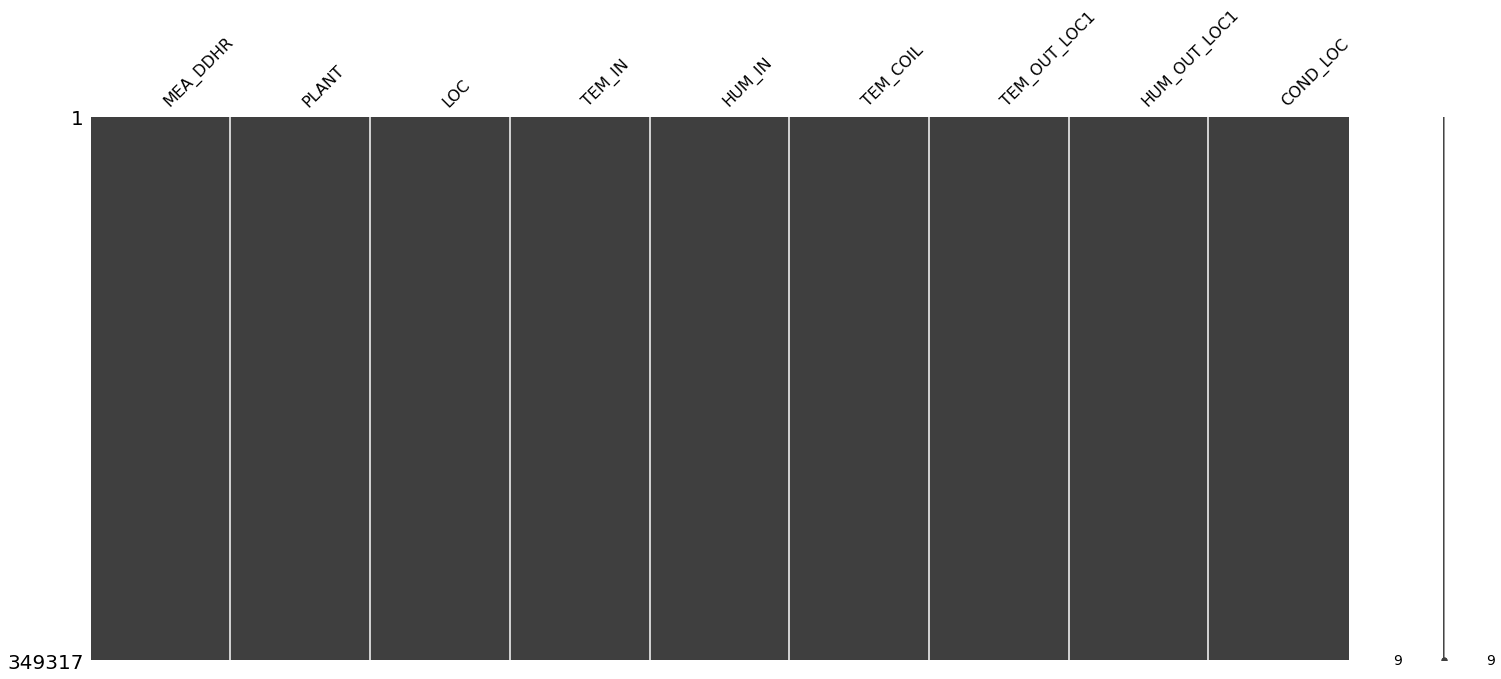

In [27]:
missingno.matrix(plant)

In [28]:
plant.to_csv("data/21.savedata_plant/plant.csv")  # csv 로 저장

# 24시간 ,48시간 결로발생 변수 생성
## X24H_TMA, X48H_TMA 생성(Date 컬럼)

In [29]:
from datetime import datetime, timedelta  #datetime을 index로 처리, n일 후

In [30]:
plant['X24H_TMA'] = pd.DatetimeIndex(plant["MEA_DDHR"]) + timedelta(days=1)
plant['X48H_TMA'] = pd.DatetimeIndex(plant["MEA_DDHR"]) + timedelta(days=2)
plant['MEA_DDHR'] = pd.to_datetime(plant['MEA_DDHR'])

plant['PLANT'] = plant['PLANT'].astype(str)  #astype() 타입 바꾸기
plant['LOC'] = plant['LOC'].astype(str)

plant['MEA_DDHR'] = plant['MEA_DDHR'].astype(str)
plant['MEA_DDHR'] = plant['MEA_DDHR'].str.slice(start=0, stop=16)  #문자열자르기 slice(시작, 끝, step)

plant['X24H_TMA'] = plant['X24H_TMA'].astype(str)
plant['X24H_TMA'] = plant['X24H_TMA'].str.slice(start=0, stop=16)

plant['X48H_TMA'] = plant['X48H_TMA'].astype(str)
plant['X48H_TMA'] = plant['X48H_TMA'].str.slice(start=0, stop=16)

In [31]:
plant

,MEA_DDHR,PLANT,LOC,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,COND_LOC,X24H_TMA,X48H_TMA
0,2016-04-01 00:00,1,1,16.00,24.00,11.00,9.00,42.00,0.0,2016-04-02 00:00,2016-04-03 00:00
1,2016-04-01 00:00,1,2,14.00,23.00,11.00,9.00,42.00,0.0,2016-04-02 00:00,2016-04-03 00:00
2,2016-04-01 00:00,1,3,13.00,32.00,10.00,9.00,42.00,0.0,2016-04-02 00:00,2016-04-03 00:00
3,2016-04-01 03:00,1,1,14.00,28.00,10.00,7.00,59.00,0.0,2016-04-02 03:00,2016-04-03 03:00
4,2016-04-01 03:00,1,2,12.00,32.00,9.00,7.00,59.00,0.0,2016-04-02 03:00,2016-04-03 03:00
...,...,...,...,...,...,...,...,...,...,...,...
349311,2019-03-31 23:40,2,1,8.99,37.33,9.15,4.47,53.14,0.0,2019-04-01 23:40,2019-04-02 23:40
349313,2019-03-31 23:40,2,3,8.26,39.62,9.57,4.47,53.14,0.0,2019-04-01 23:40,2019-04-02 23:40
349315,2019-03-31 23:50,1,2,10.55,36.69,11.01,6.34,45.94,0.0,2019-04-01 23:50,2019-04-02 23:50
349314,2019-03-31 23:50,1,1,10.49,38.74,10.52,6.34,45.94,0.0,2019-04-01 23:50,2019-04-02 23:50


In [32]:
plant.dtypes

MEA_DDHR         object
PLANT            object
LOC              object
TEM_IN          float64
HUM_IN          float64
TEM_COIL        float64
TEM_OUT_LOC1    float64
HUM_OUT_LOC1    float64
COND_LOC        float64
X24H_TMA         object
X48H_TMA         object
dtype: object

## X24H_COND_LOC, X48H_COND_LOC 컬럼 생성
### 참조용 컬럼 생성

In [33]:
plant['MPL'] = plant['PLANT'] + plant['LOC'] + ' ' + plant['MEA_DDHR']
plant['X24PL'] = plant['PLANT'] + plant['LOC'] + ' ' + plant['X24H_TMA']
plant['X48PL'] = plant['PLANT'] + plant['LOC'] + ' ' + plant['X48H_TMA']
plant.head()

,MEA_DDHR,PLANT,LOC,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,COND_LOC,X24H_TMA,X48H_TMA,MPL,X24PL,X48PL
0,2016-04-01 00:00,1,1,16.0,24.0,11.0,9.0,42.0,0.0,2016-04-02 00:00,2016-04-03 00:00,11 2016-04-01 00:00,11 2016-04-02 00:00,11 2016-04-03 00:00
1,2016-04-01 00:00,1,2,14.0,23.0,11.0,9.0,42.0,0.0,2016-04-02 00:00,2016-04-03 00:00,12 2016-04-01 00:00,12 2016-04-02 00:00,12 2016-04-03 00:00
2,2016-04-01 00:00,1,3,13.0,32.0,10.0,9.0,42.0,0.0,2016-04-02 00:00,2016-04-03 00:00,13 2016-04-01 00:00,13 2016-04-02 00:00,13 2016-04-03 00:00
3,2016-04-01 03:00,1,1,14.0,28.0,10.0,7.0,59.0,0.0,2016-04-02 03:00,2016-04-03 03:00,11 2016-04-01 03:00,11 2016-04-02 03:00,11 2016-04-03 03:00
4,2016-04-01 03:00,1,2,12.0,32.0,9.0,7.0,59.0,0.0,2016-04-02 03:00,2016-04-03 03:00,12 2016-04-01 03:00,12 2016-04-02 03:00,12 2016-04-03 03:00


### 현시점, 24시간후, 48시간후의 subset 생성

In [36]:
time_0 = plant[['MPL', 'COND_LOC']].copy()
time_24 = plant[['X24PL']].copy()
time_48 = plant[['X48PL']].copy()
time_0.head()

,MPL,COND_LOC
0,11 2016-04-01 00:00,0.0
1,12 2016-04-01 00:00,0.0
2,13 2016-04-01 00:00,0.0
3,11 2016-04-01 03:00,0.0
4,12 2016-04-01 03:00,0.0


In [37]:
time_24.head()

,X24PL
0,11 2016-04-02 00:00
1,12 2016-04-02 00:00
2,13 2016-04-02 00:00
3,11 2016-04-02 03:00
4,12 2016-04-02 03:00


### merge

In [38]:
time_24_merge = time_24.merge(time_0, how='left', left_on='X24PL', right_on='MPL') # merge(합칠 데이터 프레임, 왼쪽꺼 기준으로, 왼쪽, X42PL, 오른쪽 MPL)
time_24_merge.rename({'COND_LOC':'X24H_COND_LOC'}, axis='columns', inplace=True)
time_24_merge.head()

,X24PL,MPL,X24H_COND_LOC
0,11 2016-04-02 00:00,11 2016-04-02 00:00,0.0
1,12 2016-04-02 00:00,12 2016-04-02 00:00,0.0
2,13 2016-04-02 00:00,13 2016-04-02 00:00,0.0
3,11 2016-04-02 03:00,11 2016-04-02 03:00,0.0
4,12 2016-04-02 03:00,12 2016-04-02 03:00,0.0


In [39]:
plant.shape

(349317, 14)

In [40]:
time_24.shape

(349317, 1)

In [41]:
time_48_merge = time_48.merge(time_0, how='left', left_on='X48PL', right_on='MPL')
time_48_merge.rename({'COND_LOC':'X48H_COND_LOC'}, axis='columns', inplace=True)
time_48_merge.head()

,X48PL,MPL,X48H_COND_LOC
0,11 2016-04-03 00:00,11 2016-04-03 00:00,0.0
1,12 2016-04-03 00:00,12 2016-04-03 00:00,0.0
2,13 2016-04-03 00:00,13 2016-04-03 00:00,0.0
3,11 2016-04-03 03:00,11 2016-04-03 03:00,0.0
4,12 2016-04-03 03:00,12 2016-04-03 03:00,0.0


In [42]:
X24H_COND_LOC = time_24_merge['X24H_COND_LOC']
plant_24plus = pd.concat([plant, X24H_COND_LOC], axis=1)
plant_24plus.head()

,MEA_DDHR,PLANT,LOC,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,COND_LOC,X24H_TMA,X48H_TMA,MPL,X24PL,X48PL,X24H_COND_LOC
0,2016-04-01 00:00,1,1,16.0,24.0,11.0,9.0,42.0,0.0,2016-04-02 00:00,2016-04-03 00:00,11 2016-04-01 00:00,11 2016-04-02 00:00,11 2016-04-03 00:00,0.0
1,2016-04-01 00:00,1,2,14.0,23.0,11.0,9.0,42.0,0.0,2016-04-02 00:00,2016-04-03 00:00,12 2016-04-01 00:00,12 2016-04-02 00:00,12 2016-04-03 00:00,0.0
2,2016-04-01 00:00,1,3,13.0,32.0,10.0,9.0,42.0,0.0,2016-04-02 00:00,2016-04-03 00:00,13 2016-04-01 00:00,13 2016-04-02 00:00,13 2016-04-03 00:00,0.0
3,2016-04-01 03:00,1,1,14.0,28.0,10.0,7.0,59.0,0.0,2016-04-02 03:00,2016-04-03 03:00,11 2016-04-01 03:00,11 2016-04-02 03:00,11 2016-04-03 03:00,0.0
4,2016-04-01 03:00,1,2,12.0,32.0,9.0,7.0,59.0,0.0,2016-04-02 03:00,2016-04-03 03:00,12 2016-04-01 03:00,12 2016-04-02 03:00,12 2016-04-03 03:00,0.0


In [43]:
X48H_COND_LOC = time_48_merge['X48H_COND_LOC']
plant_48plus = pd.concat([plant_24plus, X48H_COND_LOC], axis=1)
plant_48plus.head()

,MEA_DDHR,PLANT,LOC,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,COND_LOC,X24H_TMA,X48H_TMA,MPL,X24PL,X48PL,X24H_COND_LOC,X48H_COND_LOC
0,2016-04-01 00:00,1,1,16.0,24.0,11.0,9.0,42.0,0.0,2016-04-02 00:00,2016-04-03 00:00,11 2016-04-01 00:00,11 2016-04-02 00:00,11 2016-04-03 00:00,0.0,0.0
1,2016-04-01 00:00,1,2,14.0,23.0,11.0,9.0,42.0,0.0,2016-04-02 00:00,2016-04-03 00:00,12 2016-04-01 00:00,12 2016-04-02 00:00,12 2016-04-03 00:00,0.0,0.0
2,2016-04-01 00:00,1,3,13.0,32.0,10.0,9.0,42.0,0.0,2016-04-02 00:00,2016-04-03 00:00,13 2016-04-01 00:00,13 2016-04-02 00:00,13 2016-04-03 00:00,0.0,0.0
3,2016-04-01 03:00,1,1,14.0,28.0,10.0,7.0,59.0,0.0,2016-04-02 03:00,2016-04-03 03:00,11 2016-04-01 03:00,11 2016-04-02 03:00,11 2016-04-03 03:00,0.0,0.0
4,2016-04-01 03:00,1,2,12.0,32.0,9.0,7.0,59.0,0.0,2016-04-02 03:00,2016-04-03 03:00,12 2016-04-01 03:00,12 2016-04-02 03:00,12 2016-04-03 03:00,0.0,0.0


In [44]:
plant = plant_48plus.copy()
plant.columns
plant = plant.drop(columns=['MPL','X24PL', 'X48PL'])
plant.head()

,MEA_DDHR,PLANT,LOC,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,COND_LOC,X24H_TMA,X48H_TMA,X24H_COND_LOC,X48H_COND_LOC
0,2016-04-01 00:00,1,1,16.0,24.0,11.0,9.0,42.0,0.0,2016-04-02 00:00,2016-04-03 00:00,0.0,0.0
1,2016-04-01 00:00,1,2,14.0,23.0,11.0,9.0,42.0,0.0,2016-04-02 00:00,2016-04-03 00:00,0.0,0.0
2,2016-04-01 00:00,1,3,13.0,32.0,10.0,9.0,42.0,0.0,2016-04-02 00:00,2016-04-03 00:00,0.0,0.0
3,2016-04-01 03:00,1,1,14.0,28.0,10.0,7.0,59.0,0.0,2016-04-02 03:00,2016-04-03 03:00,0.0,0.0
4,2016-04-01 03:00,1,2,12.0,32.0,9.0,7.0,59.0,0.0,2016-04-02 03:00,2016-04-03 03:00,0.0,0.0


## 24, 48시간 후 결로발생여부 결측치 처리

In [45]:
plant['COND_LOC'].value_counts()

0.0    347338
1.0      1979
Name: COND_LOC, dtype: int64

In [46]:
plant['X24H_COND_LOC'].value_counts()

0.0    344812
1.0      1979
Name: X24H_COND_LOC, dtype: int64

In [47]:
plant['X48H_COND_LOC'].value_counts()

0.0    343627
1.0      1979
Name: X48H_COND_LOC, dtype: int64

<AxesSubplot:>

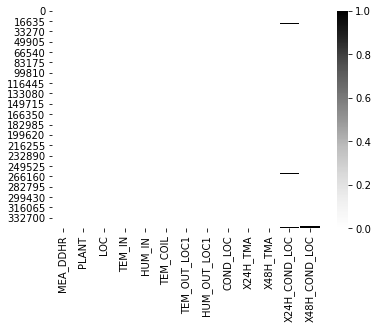

In [48]:
sns.heatmap(plant.isnull(), cmap='Greys')

In [49]:
plant = plant.fillna(0)  #null 0으로 채우기
plant.isnull().sum()  #null값 개수 확인

MEA_DDHR         0
PLANT            0
LOC              0
TEM_IN           0
HUM_IN           0
TEM_COIL         0
TEM_OUT_LOC1     0
HUM_OUT_LOC1     0
COND_LOC         0
X24H_TMA         0
X48H_TMA         0
X24H_COND_LOC    0
X48H_COND_LOC    0
dtype: int64

In [51]:
plant = plant[['MEA_DDHR', 'PLANT', 'LOC', 'TEM_IN', 'HUM_IN', 'TEM_COIL',
       'TEM_OUT_LOC1', 'HUM_OUT_LOC1', 'COND_LOC', 'X24H_TMA', 'X24H_COND_LOC', 'X48H_TMA', 'X48H_COND_LOC']]

In [52]:
plant['MEA_DDHR'] = pd.to_datetime(plant['MEA_DDHR'])
plant['X24H_TMA'] = pd.to_datetime(plant['X24H_TMA'])
plant['X48H_TMA'] = pd.to_datetime(plant['X48H_TMA'])

plant.dtypes

MEA_DDHR         datetime64[ns]
PLANT                    object
LOC                      object
TEM_IN                  float64
HUM_IN                  float64
TEM_COIL                float64
TEM_OUT_LOC1            float64
HUM_OUT_LOC1            float64
COND_LOC                float64
X24H_TMA         datetime64[ns]
X24H_COND_LOC           float64
X48H_TMA         datetime64[ns]
X48H_COND_LOC           float64
dtype: object

In [54]:
plant.to_csv("data/21.savedata_plant/plant.csv", index=False)

In [55]:
plant.dtypes

MEA_DDHR         datetime64[ns]
PLANT                    object
LOC                      object
TEM_IN                  float64
HUM_IN                  float64
TEM_COIL                float64
TEM_OUT_LOC1            float64
HUM_OUT_LOC1            float64
COND_LOC                float64
X24H_TMA         datetime64[ns]
X24H_COND_LOC           float64
X48H_TMA         datetime64[ns]
X48H_COND_LOC           float64
dtype: object

In [56]:
plant.head()

,MEA_DDHR,PLANT,LOC,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,COND_LOC,X24H_TMA,X24H_COND_LOC,X48H_TMA,X48H_COND_LOC
0,2016-04-01 00:00:00,1,1,16.0,24.0,11.0,9.0,42.0,0.0,2016-04-02 00:00:00,0.0,2016-04-03 00:00:00,0.0
1,2016-04-01 00:00:00,1,2,14.0,23.0,11.0,9.0,42.0,0.0,2016-04-02 00:00:00,0.0,2016-04-03 00:00:00,0.0
2,2016-04-01 00:00:00,1,3,13.0,32.0,10.0,9.0,42.0,0.0,2016-04-02 00:00:00,0.0,2016-04-03 00:00:00,0.0
3,2016-04-01 03:00:00,1,1,14.0,28.0,10.0,7.0,59.0,0.0,2016-04-02 03:00:00,0.0,2016-04-03 03:00:00,0.0
4,2016-04-01 03:00:00,1,2,12.0,32.0,9.0,7.0,59.0,0.0,2016-04-02 03:00:00,0.0,2016-04-03 03:00:00,0.0
